In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
# Add the path to the `src/estimator/` directory

# Navigate to the parent directory (fdp-estimation) and add `src` to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(project_root)

# Import KDE_Estimator from estimator_kde
from estimator.estimator_kde import KDE_Estimator


In [2]:
# Define parameters
sigma = 1
x1 = np.array([1] + [0] * 9)
x2 = np.zeros(10)

# Define the mechanism function
def Sum_Gauss(x):
    s = np.sum(x) + np.random.normal(0, sigma)
    return s

# Command line arguments (replace with actual arguments or defaults for testing)
N = 10**6  # Default value
h = .1  # Default value

eta_max = 15

# Run KDE_Estimator
output_df = KDE_Estimator(eta_max=eta_max, Mechanism=Sum_Gauss, x1=x1, x2=x2, N=N, h=h)

# Define Gaussian curve function
mu_1 = 0
mu_2 = 1


def Gaussian_curve(alpha):
    return norm.cdf(norm.ppf(1 - alpha) - mu_2)

# Extract alpha and beta for plotting
alpha = output_df["alpha"]
beta = output_df["beta"]

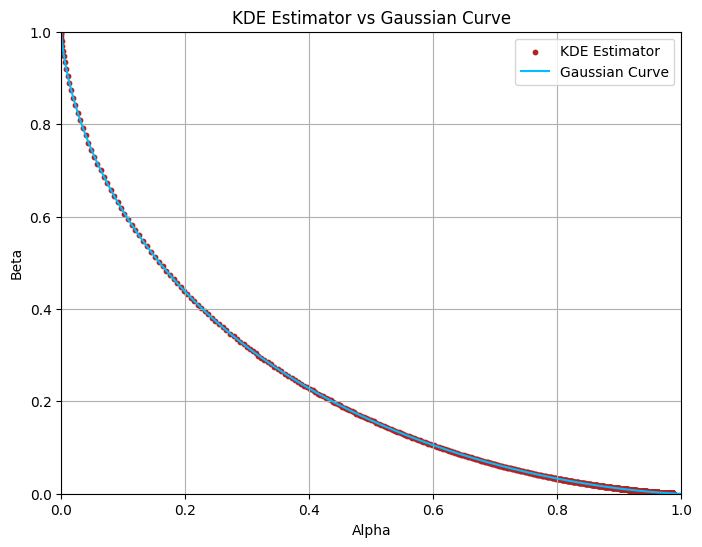

In [3]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(alpha, beta, color="firebrick", s=10, label="KDE Estimator")
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Gaussian_curve(alpha_values), color="deepskyblue", linewidth=1.5, label="Gaussian Curve")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Gaussian Curve")
plt.legend()
plt.grid()

# Save the plot
#output_filename = f"L_output_plot_N{N}_h_{h:.1f}.png"
#plt.savefig(output_filename, dpi=300)
plt.show()